In [1]:
cd ..

/Users/yanndubois/SSL-Risk-Decomposition


In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
#!rm -rf /Users/yanndubois/.cache/torch/hub/YannDubs_SSL-Risk-Decomposition_main

# Collect all results

In [4]:
import pandas as pd
from utils.plotting import *
from utils.collect_results import *
from utils.causal import *
import numpy as np
import warnings
import logging
import hubconf
from pathlib import Path

 No module named 'clip'


In [9]:
df, metadata_df = load_df(is_zero_approx=False)

df_sup = df.query("ssl_mode == 'supervised'")
df_init = df.query("ssl_mode == 'initialized'")
df = df.query("ssl_mode != 'initialized' & ssl_mode != 'supervised'")
df_IN = df.query("pretraining_data == 'ImageNet-1K'")

Found 178 result files to load.


Missing results for: init_rn50_d8192
Found missing supervised models for:


pred seed       arch
0   torch_linear_delta_hypopt  123    missing
1   torch_linear_delta_hypopt  123    missing
2   torch_linear_delta_hypopt  123    missing
3   torch_linear_delta_hypopt  123    missing
4   torch_linear_delta_hypopt  123    missing
5   torch_linear_delta_hypopt  123    missing
6   torch_linear_delta_hypopt  123    missing
7   torch_linear_delta_hypopt  123    missing
8   torch_linear_delta_hypopt  123    missing
9   torch_linear_delta_hypopt  123    missing
10  torch_linear_delta_hypopt  123    missing
11  torch_linear_delta_hypopt  123  vits8 cls
12  torch_linear_delta_hypopt  123    missing

[usability] = [train_train] - [sup_train_train]
[probe_gen] = [train-cmplmnt-ntest_train-sbst-ntest] - [train_train]
[enc_gen] = [train_test] - [train-cmplmnt-ntest_train-sbst-ntest]


Found negative values:


train-cmplmnt-ntest_train-sbst-ntest  \
enc                                                                   
dino_vitb16_extracts                                         19.042   
dissl_resnet50_d4096_e100_m2                                 32.994   
dissl_resnet50_d8192_e100_m2                                 32.276   
dissl_resnet50_d8192_e400_m6                                 24.528   
dissl_resnet50_d8192_e800_m8                                 23.880   
init_vitb32                                                  96.200   
init_vitl16                                                  93.020   
pirl_rn50w2_headmlp                                          26.080   
simclr_resnet50_d8192_e100_m2                                30.432   
simclr_rn50w2                                                22.516   
simclr_rn50w2_ep100                                          27.646   
swav_rn50w2                                                  20.944   
vicreg_rn50w2                                                22.352   

                               train_train  train-cmplmnt-ntest_test  \
enc                                                                    
dino_vitb16_extracts                 0.811                    23.680   
dissl_resnet50_d4096_e100_m2         0.491                    32.988   
dissl_resnet50_d8192_e100_m2         0.656                    33.756   
dissl_resnet50_d8192_e400_m6         0.464                    28.492   
dissl_resnet50_d8192_e800_m8         0.463                    28.138   
init_vitb32                         92.428                       NaN   
init_vitl16                         87.061                       NaN   
pirl_rn50w2_headmlp                  0.651                       NaN   
simclr_resnet50_d8192_e100_m2        0.465                    33.966   
simclr_rn50w2                        0.472                    26.106   
simclr_rn50w2_ep100                  0.473                    30.854   
swav_rn50w2                          0.248                    24.216   
vicreg_rn50w2                        0.256                    25.392   

                               train_test  union_test  sup_train_train  \
enc                                                                      
dino_vitb16_extracts               23.572         NaN            1.548   
dissl_resnet50_d4096_e100_m2       32.846         NaN            0.845   
dissl_resnet50_d8192_e100_m2       33.578         NaN            0.845   
dissl_resnet50_d8192_e400_m6       28.344         NaN            0.845   
dissl_resnet50_d8192_e800_m8       28.004         NaN            0.845   
init_vitb32                        95.864         NaN            1.132   
init_vitl16                        92.952         NaN            0.553   
pirl_rn50w2_headmlp                29.502         NaN            0.743   
simclr_resnet50_d8192_e100_m2      33.920         NaN            0.845   
simclr_rn50w2                      26.060         NaN            0.743   
simclr_rn50w2_ep100                30.706         NaN            0.743   
swav_rn50w2                        23.980         NaN            0.743   
vicreg_rn50w2                      25.326         NaN            0.743   

                               sup_train_test  agg_risk  approx  usability  \
enc                                                                          
dino_vitb16_extracts                   16.046    23.572   1.548     -0.737   
dissl_resnet50_d4096_e100_m2           24.244    32.846   0.845     -0.354   
dissl_resnet50_d8192_e100_m2           24.244    33.578   0.845     -0.189   
dissl_resnet50_d8192_e400_m6           24.244    28.344   0.845     -0.381   
dissl_resnet50_d8192_e800_m8           24.244    28.004   0.845     -0.382   
init_vitb32                            20.204    95.864   1.132     91.296   
init_vitl16                            15.880    92.952   0.553     86.508   
pirl_rn50w2_headmlp                    22.102    29.502   0.743     -0.

The following results seem suspicously bad:


agg_risk
enc                        
beit_vitb16_pt22k    57.194

The following models have very different original and evalauted performance:


enc
deepcluster_rn50_bs512_ep200_mmselfsup   -17.566000
dissl_resnet50_dnone_e100_m2               5.037999
jigsaw_rn50                               10.766001
jigsaw_rn50_in22k                         17.584002
msn_vitl16_ep600                           6.359999
rotnet_rn50_in1k                           7.164002
rotnet_rn50_in22k                          7.314002
simclr_rn50_bs256_ep200_mmselfsup          6.275999
speccl_resnet50_bs384_ep100                5.306000
dtype: float64

The following results have some nan:


approx  usability  probe_gen  enc_gen
enc                                                             
dino_vits16_extractb          NaN        NaN     10.441    4.102
dino_vits16_last              NaN        NaN      4.293    3.812
dino_vits8_last               NaN        NaN      4.449    3.818
ibot_vits16                   NaN        NaN      4.515    2.740
init_vits16                   NaN        NaN      1.423    0.324
init_vits16_dino_extractb     NaN        NaN      3.921    0.050
mocov3_vits_ep300             NaN        NaN      5.416    3.850
msn_vits16_ep800              NaN        NaN      5.070    3.288
mugs_vits16_ep100             NaN        NaN      5.108    3.066
mugs_vits16_ep300             NaN        NaN      5.269    3.486
mugs_vits16_ep800             NaN        NaN      4.941    3.710
sup_vits16                    NaN        NaN      6.255    5.376
sup_vits16_dino_extractb      NaN        NaN      5.786    6.644

In [10]:
dummy_aug = pd.get_dummies(df.augmentations.apply(pd.Series).stack()).groupby(level=0).sum()

ANY_GEOMETRIC = ["crop","flip","rotate","autoaugment"]
ANY_PHOTOMETRIC = ["blur","color","gray","photometric","solarize","autoaugment"]
dummy_aug["anygeometric"] =  dummy_aug[ANY_GEOMETRIC].any(axis=1).astype(int)
dummy_aug["anycolor"] =  dummy_aug[ANY_PHOTOMETRIC].any(axis=1).astype(int)

dummy_aug.rename(columns=dict(autoaugment="autoaug"), inplace=True)
dummy_aug.columns = [f"is_aug_{c}" for c in dummy_aug.columns]

df = pd.merge(left=df,
              right=dummy_aug,
              right_index=True,
              left_index=True)

AUGMENTATIONS = list(dummy_aug.columns)

In [11]:
std = load_all_results(pattern=f"**/seed_*/results_all.csv", 
                           skip_ifneq={}, 
                           skip_ifin=dict(ssl=["swav_rn50w5","selav2_rn50_ep400_2x160_4x96"]))
std = std[std.index.isin(['sk_logistic_hypopt','torch_linear_delta_hypopt'], level=1)]
# CORE_METRICS = ["train_test"
#                ] + [c for c in std.columns 
#                    if c.endswith("_test") and (c.startswith('train-balsbst-ntrain') or c.startswith('train-nperclass-')) ]
CORE_METRICS = ["train_test", "train-nperclass-30_test", "train-balsbst-ntrain0.01_test", "train-nperclass-5_test", "train-nperclass-3_test"]
std = std[CORE_METRICS]
assert not (std.groupby("enc").nunique() > 1).any().any()
std = std.groupby("enc").mean()
#std["delta-100%-1%"] = std["train-balsbst-ntrain0.01_test"] - std["train_test"]
METRICS = CORE_METRICS #+ ["delta-100%-1%"]

Found 1223 result files to load.


In [12]:
print("Following results are missing:")
missing=std[std.isna().any(axis=1)]
missing[[("init" not in i) and ("sup" not in i) for i in missing.index]]

Following results are missing:


Empty DataFrame
Columns: [train_test, train-nperclass-30_test, train-balsbst-ntrain0.01_test, train-nperclass-5_test, train-nperclass-3_test]
Index: []

In [8]:
df = pd.merge(left=df,right=std[CORE_METRICS[1:]],
              right_index=True,left_index=True)

# coarsens many different parameters for cleaner plots
#df = preprocess_features(df, round_dict={}, pow_dict={})

melted = melt(df)
#melted_wdelta = melt(df, components=COMPONENTS+["delta-100%-1%"])

In [13]:
df = pd.merge(left=df,
              right=std[METRICS[1:]],
              right_index=True,
              left_index=True)

df["patch_size"] = df.apply(lambda row: (4 if row["family"] == "convnext" else 7) if pd.isna(row["patch_size"]) else row["patch_size"], axis=1)


# coarsens many different parameters for cleaner plots
#df = preprocess_features(df, round_dict={}, pow_dict={})

#non_core_params = ['date_published','top1acc_in1k_official','projection_nparameters']
core_params = ['objective','version','architecture','patch_size','z_dim','z_layer',
               "epochs","batch_size", "optimizer", "learning_rate", "weight_decay", "scheduler",
               "pretraining_data",'img_size','year',"nviews",'finetuning_data','projection1_arch','projection2_arch','projection_same', 
               "n_augmentations", "other"]#, "pred_dim"
minimal_params = ['objective','version','architecture','patch_size','z_dim','z_layer',"pretraining_data",'finetuning_data']

df_core = df.set_index(core_params)[COMPONENTS]
df_minimal = df.set_index(minimal_params)[COMPONENTS]
df_nona = df[~df[COMPONENTS ].isna().any(axis=1)].copy()
df_IN = df.query("pretraining_data == 'ImageNet-1K'")

CORE_STATISTICS = ['train_rank', "train_uniformity", 'trainrealaug_alignment', "trainrealaug_vars", 
                   "trainrealaug_nc1norm", 'train_rank_Z'  ]
MINI_STATISTICS = ['train_rank', "train_uniformity", 'trainrealaug_alignment', "trainrealaug_vars", "train_rank_Z" ]

to_fit = COMPONENTS + ['train-nperclass-3_test']
melted = melt(df, components=to_fit)
melted_onlyComp = melt(df, components=COMPONENTS_ONLY)
melted_stats = melt(df, components=CORE_STATISTICS)
melted_ministats = melt(df, components=MINI_STATISTICS)
#melted_wdelta = melt(df, components=COMPONENTS+["delta-100%-3shot"])

melted_metrics = pd.melt(melted_onlyComp,
                   value_vars=METRICS,
                   id_vars=[c for c in melted_onlyComp.columns if c not in METRICS],
                   var_name="metric",
                    value_name='metric_value',
                    )

melted_Onlymetrics = pd.melt(melted_onlyComp,
                   value_vars=CORE_METRICS,
                   id_vars=[c for c in melted_onlyComp.columns if c not in CORE_METRICS],
                   var_name="metric",
                    value_name='metric_value',
                    )

## Introduction

Let's plot the dcomposition of (nearly) all results. Note that we only plot the ones that have no NaN.

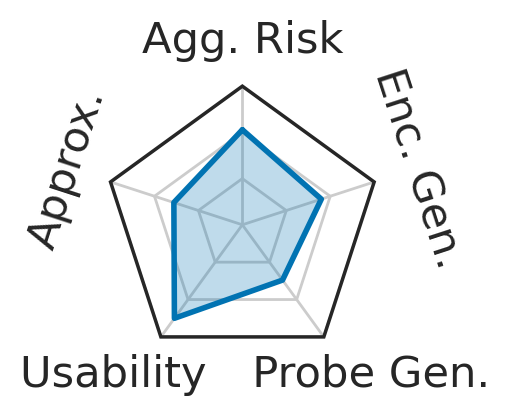

In [15]:
data = df.copy()
data["usability   "] = df["usability"]
data["   probe_gen"] = df["probe_gen"]
plot_radar_grid(data, 
                ncols=1, 
                models=[],
                components=["agg_risk"]+['approx', 'usability   ', '   probe_gen', 'enc_gen'], 
                save_path="figures/radar_avg.pdf",
                config_kwargs=dict(is_despine=False, font_scale=1.3, is_use_tex=False),
                is_plot_avg=True,
                is_tex=False)

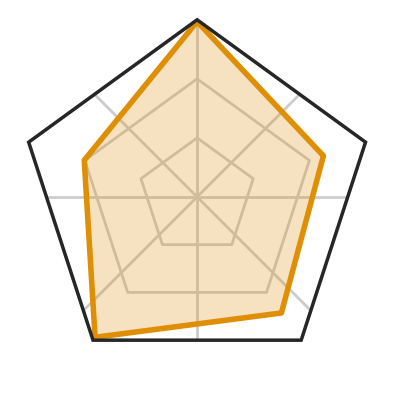

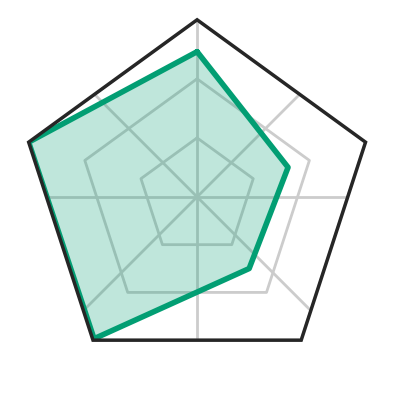

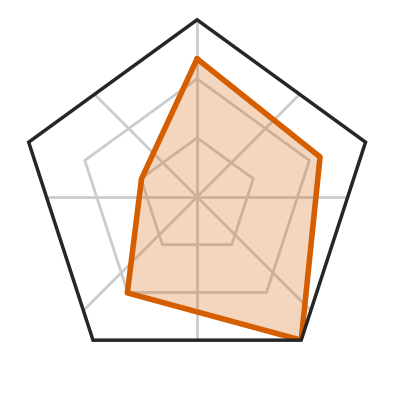

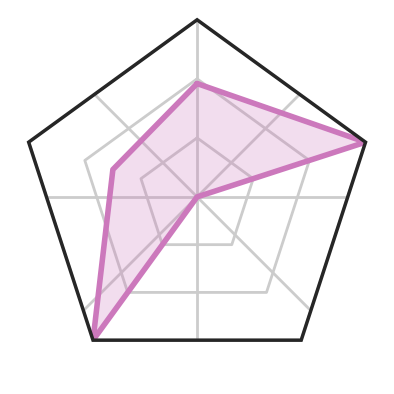

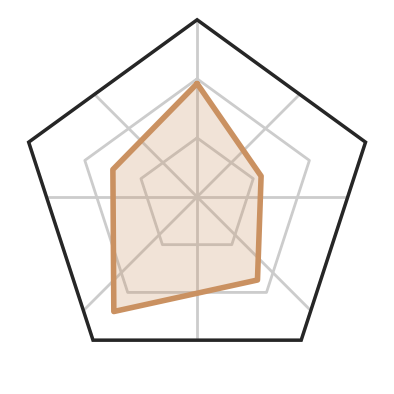

In [16]:
models = ["clip_vitl14","swav_rn50w4","lossyless_vitb32_b01","dissl_resnet50_d4096_e100_m2","simclr_rn50"]
colors = sns.color_palette("colorblind", n_colors=len(models)+1)
config_kwargs = dict(is_despine=False, font_scale=1, is_use_tex=True)
for i,m in enumerate(models):
    with plot_config(**config_kwargs):
        isna = df[COMPONENTS].isna().any(axis=1)
        results = df[~isna][COMPONENTS].copy()

        radar_data = get_radar_data(results, 
                                    components=["agg_risk"]+COMPONENTS_ONLY,
                                    models=[m])

        columns = radar_data.columns
        theta = radar_factory(len(columns), frame='polygon')

        to_plot = first_data = radar_data.iloc[0, :]

        fig, ax = plt.subplots(nrows=1,
                                 ncols=1,
                                 figsize=(3.5, 2.3),
                                 subplot_kw=dict(projection='radar'))

        # first plot
        _=plot_radar(ax, theta, first_data,
                   title=None,
                   is_ticks_label=False,
                   labels=None,
                   color=colors[i+1])
        
        plt.savefig(f"figures/radar_{m}.pdf", bbox_inches='tight', pad_inches=0)

## Results

### Trends

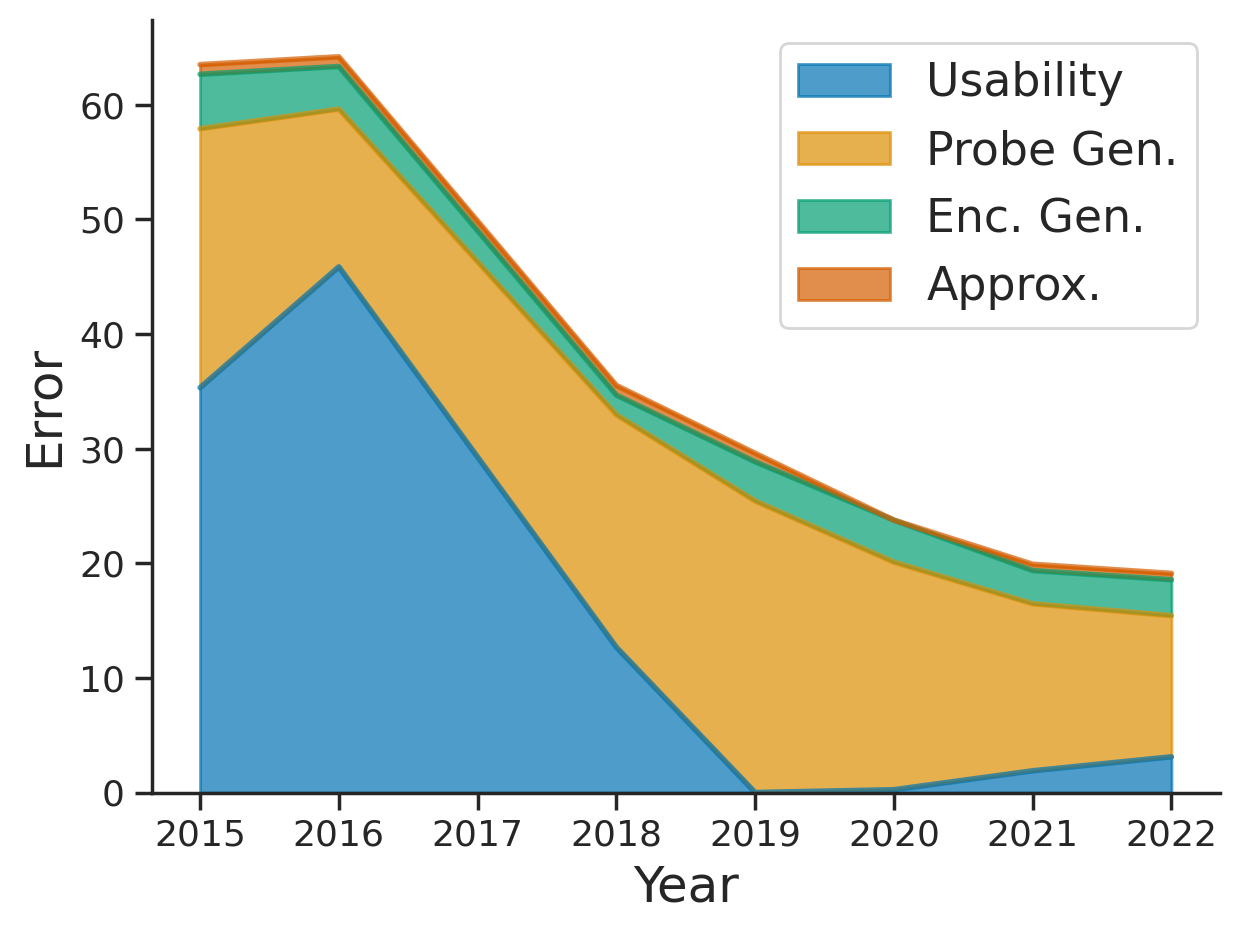

In [17]:
plot_trend(df.query('pretraining_data == "ImageNet-1K" '), 
           is_min=True,
           save_path="figures/trend_min_noclip.pdf")

### Tradeoffs

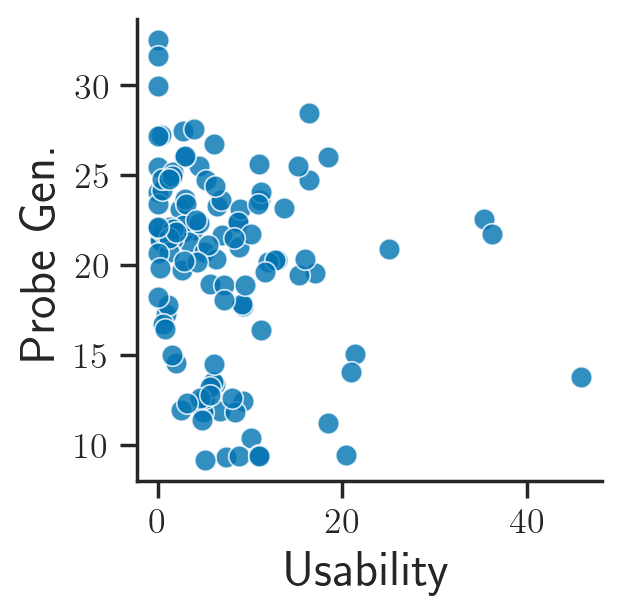

In [18]:

with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    fig, ax= plt.subplots(1,1, figsize=(3,3))
    
    g=sns.scatterplot(data=df_IN[COMPONENTS_ONLY+["year"]].rename(columns=PRETTY_RENAMER), 
                      x="Usability", y="Probe Gen.", ax=ax, s=60, alpha=0.8)
    #g.set_ylim(10,18)
    #g.set_xlim(-1,7)
    #plt.axis('scaled')
    
plt.savefig(f"figures/tradeoff_probe-usability_all.pdf", bbox_inches='tight', pad_inches=0)
    

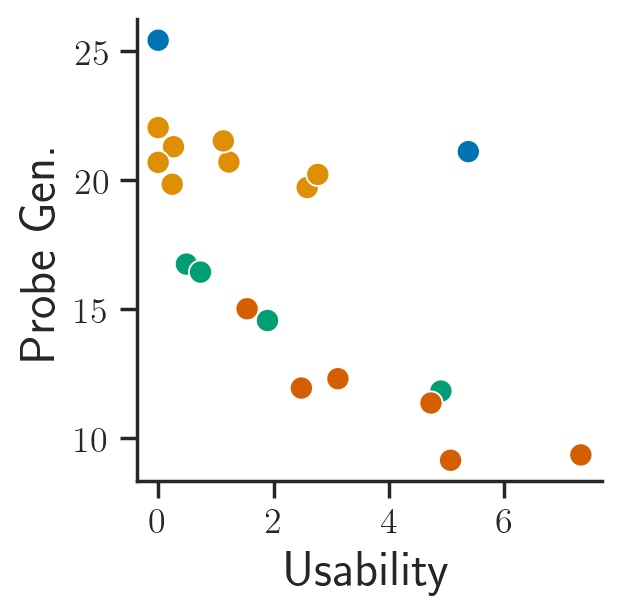

In [19]:

with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, "legend.fontsize": 13}):
    fig, ax= plt.subplots(1,1, figsize=(3,3))
    
    data=filter_by_quantile(df_IN, is_year=True, quantile=0.15)[COMPONENTS_ONLY+["year"]].query("year >= 2019").rename(columns=PRETTY_RENAMER)
    data["Year"] = data["Year"].astype("category")
    g=sns.scatterplot(data=data, s=70, 
                      x="Usability", y="Probe Gen.", ax=ax, hue="Year", legend = False)
    #sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)

    #g._legend.remove()
    
    #g.set_ylim(10,18)
    #g.set_xlim(-1,15)
    ax.yaxis.get_major_locator().set_params(integer=True)
    #plt.axis('scaled')
    
plt.savefig(f"figures/tradeoff_probe-usability_year.pdf", bbox_inches='tight', pad_inches=0)
    
    

#### Z dim

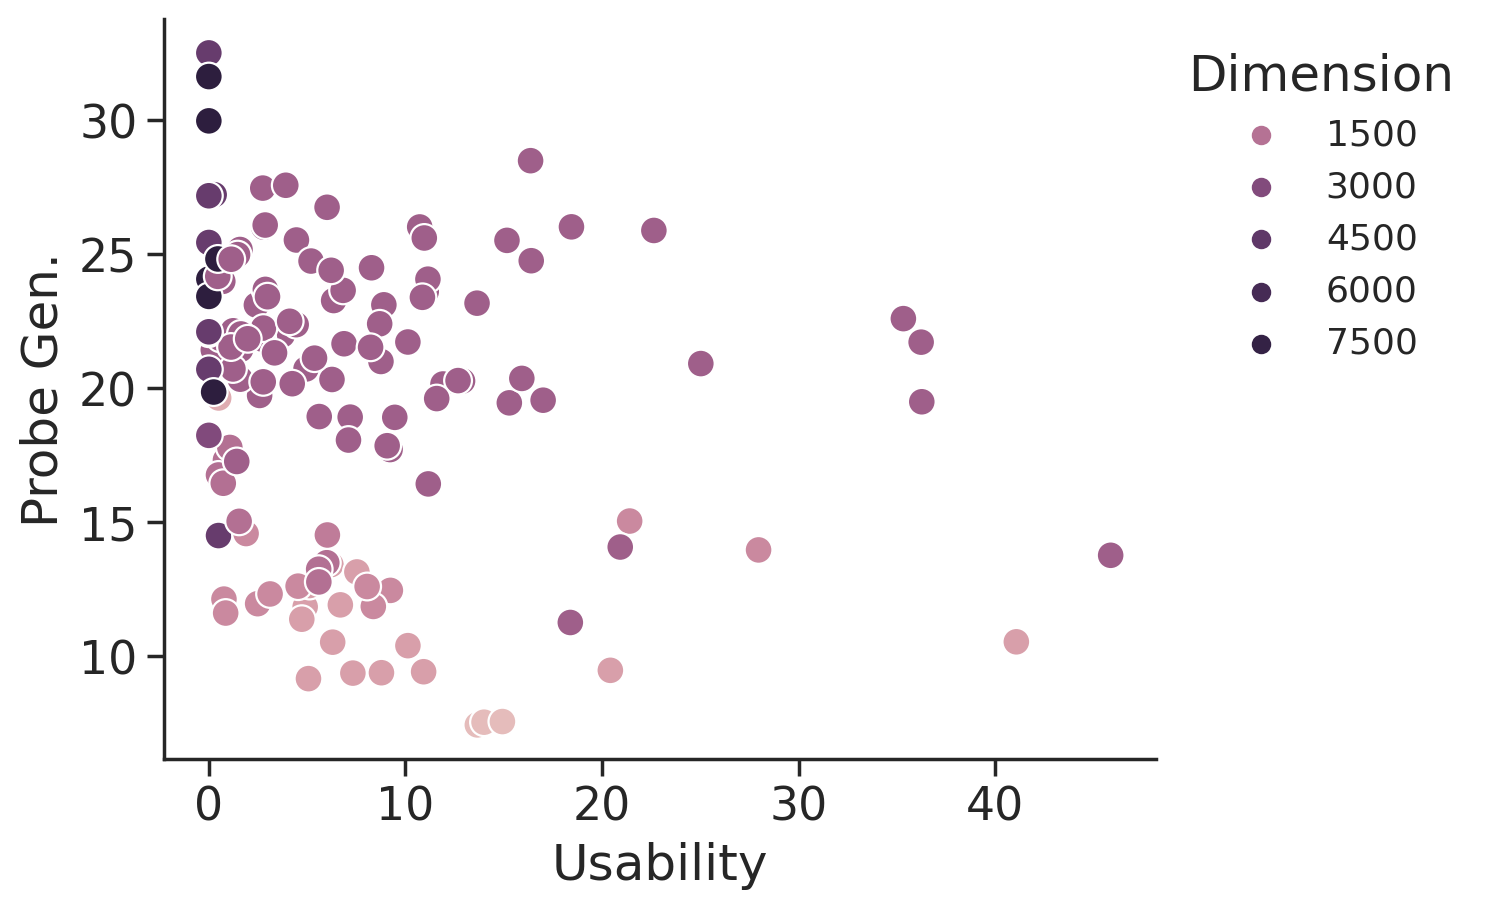

In [20]:
from matplotlib.colors import SymLogNorm

with plot_config(rc={"legend.fontsize": 13}):

    g=sns.scatterplot(data=df.rename(columns=PRETTY_RENAMER), 
                      x="Usability", 
                      y="Probe Gen.", 
                      hue="Z Dim.", 
                      hue_norm=SymLogNorm(linthresh=1,base=2),
                      s=100)
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1),ncol=1, frameon=False, 
                    title="Dimension")
    #g.set(xscale="log",yscale="log")
    
#plt.savefig("figures/tradeoff_initialized.pdf", bbox_inches='tight', pad_inches=0.1)


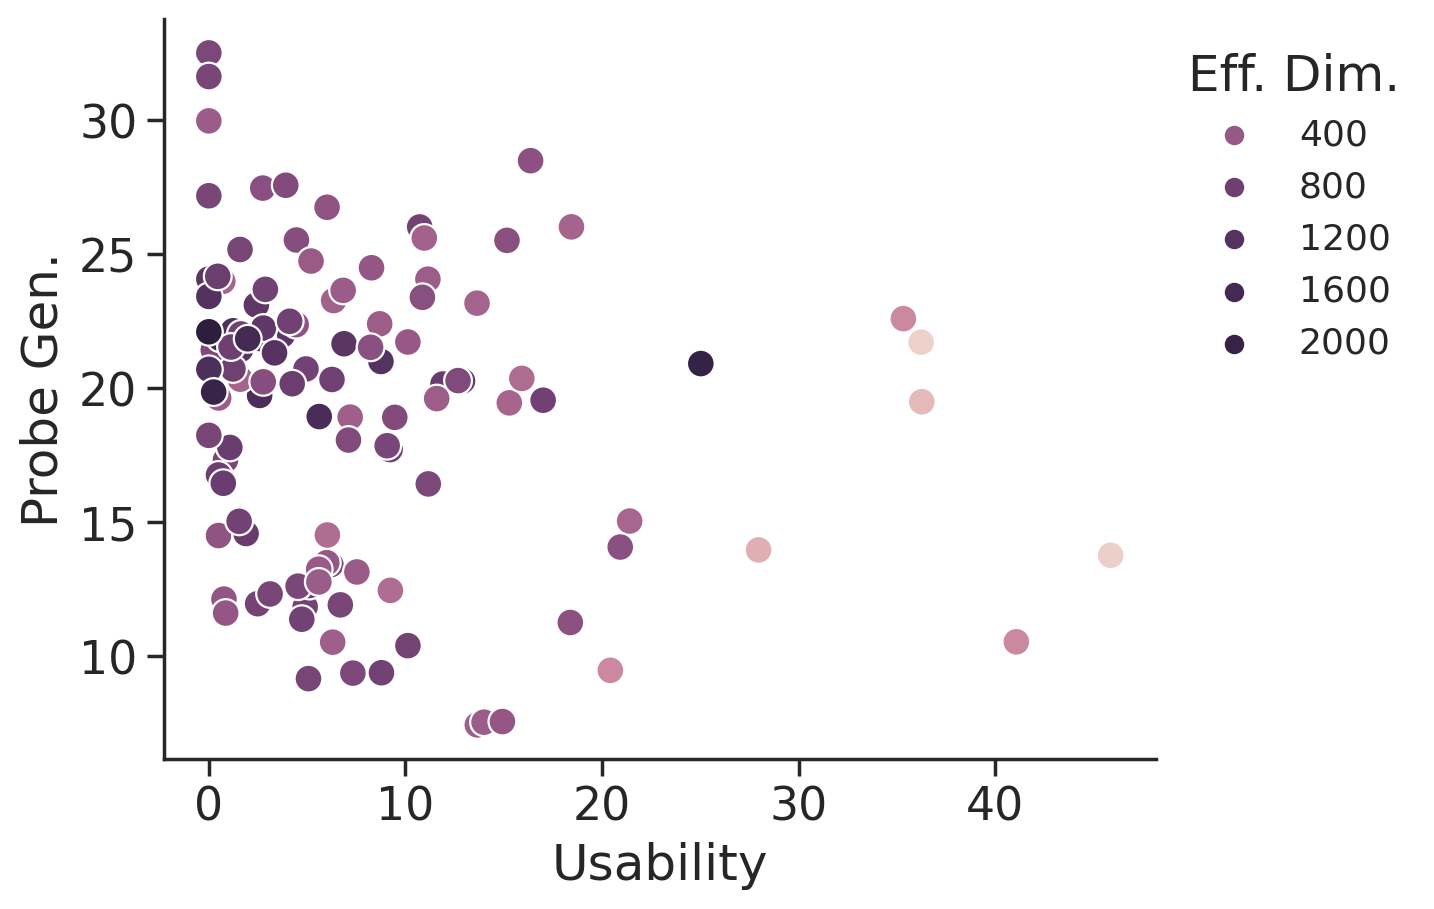

In [16]:

with plot_config(rc={"legend.fontsize": 13}):

    g=sns.scatterplot(data=df.rename(columns=PRETTY_RENAMER), 
                      x="Usability", 
                      y="Probe Gen.", 
                      hue="Train Rank", 
                      hue_norm=SymLogNorm(linthresh=1,base=2),
                      s=100)
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1),ncol=1, frameon=False, 
                    title="Eff. Dim.")
    #g.set(xscale="log",yscale="log")
    
#plt.savefig("figures/tradeoff_initialized.pdf", bbox_inches='tight', pad_inches=0.1)


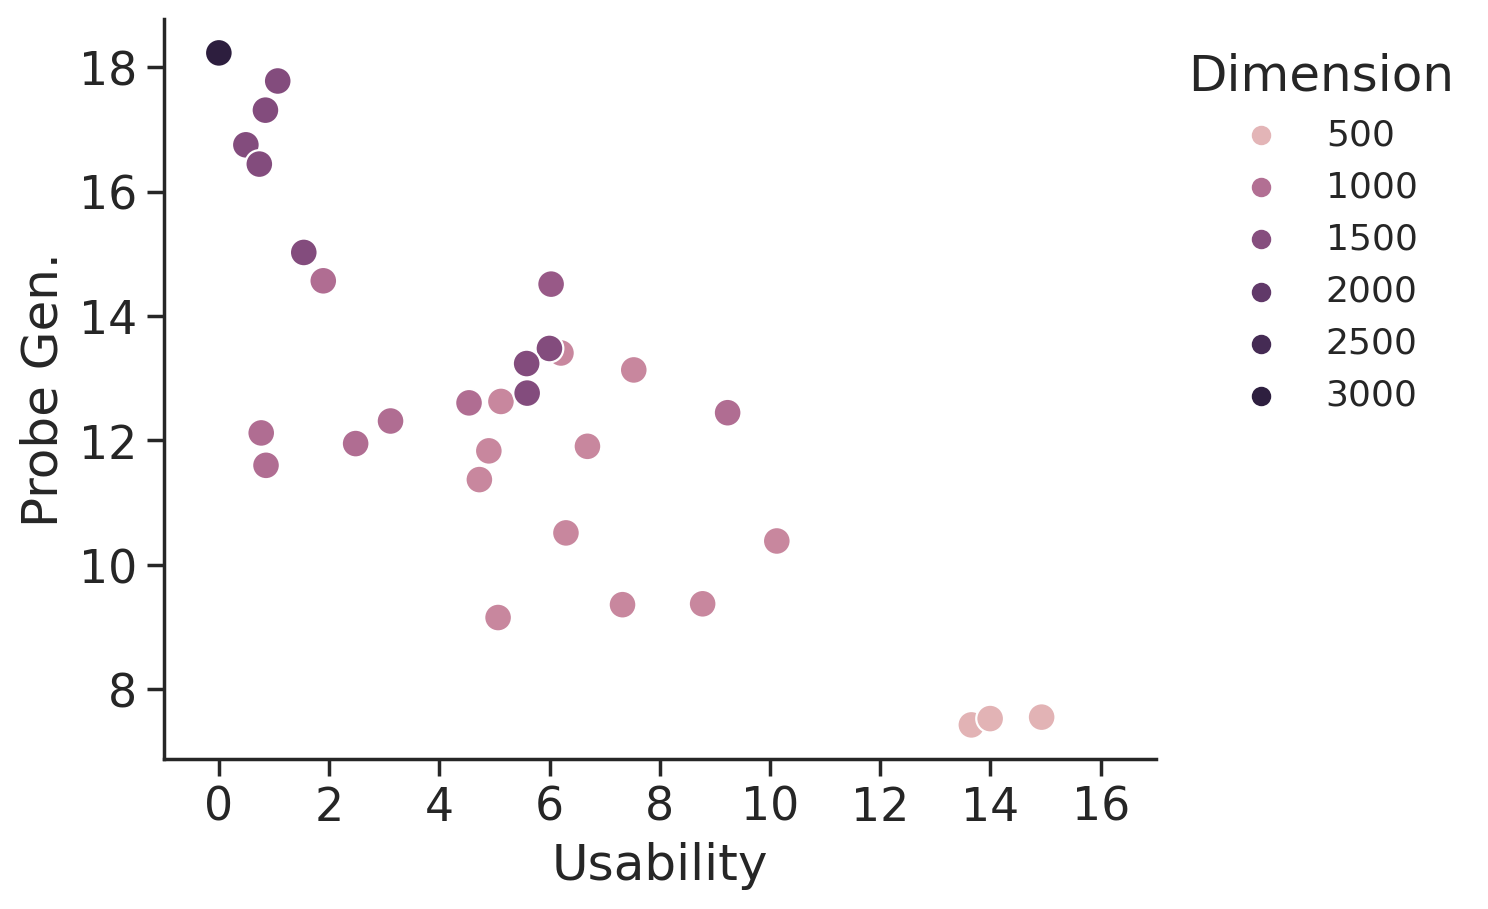

In [17]:

with plot_config(rc={"legend.fontsize": 13}):

    g=sns.scatterplot(data=df.query("family == 'vit'").rename(columns=PRETTY_RENAMER), 
                      x="Usability", 
                      y="Probe Gen.", 
                      hue="Z Dim.", 
                      hue_norm=SymLogNorm(linthresh=1,base=2),
                      s=100)
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1),ncol=1, frameon=False, 
                    title="Dimension")
    g.set(xlim=[-1,17])
    #g.set(xscale="log",yscale="log")
    
#plt.savefig("figures/tradeoff_initialized.pdf", bbox_inches='tight', pad_inches=0.1)


### Evaluation

**hypothesis** The most important when probe is trained on a lot of data is the usability and for few shot it's probe gen

#### Best performing models vary across settings

In [18]:
df_nona = df[~df[COMPONENTS].isna().any(axis=1)].copy()

In [19]:
df_nona_metric = df[~df[CORE_METRICS].isna().any(axis=1)]
rank_delta = df_nona_metric[CORE_METRICS].sort_values("train_test").copy()
rank_delta["rank_all"] = range(len(rank_delta))
rank_delta = rank_delta.sort_values('train-nperclass-3_test')
rank_delta["rank_3"] = range(len(rank_delta))
rank_delta["rank_delta"] = rank_delta["rank_all"] - rank_delta["rank_3"]
rank_delta["rank_delta_abs"] = rank_delta["rank_delta"].abs()

In [21]:
rank_delta.sort_values("rank_delta_abs",ascending=False).head(10)["rank_delta"]

enc
mae_vitl16                     -40
msn_vitl16_ep600                36
clip_rn50x16                   -30
swav_rn50w2                    -27
swav_rn50w4                    -24
byol_rn50_bs64                  23
mocov2_rn50_ep800               23
dissl_resnet50_dnone_e400_m6   -23
clip_vitb16                    -23
mocov3_vits_ep300               23
Name: rank_delta, dtype: int64

In [22]:
compute_correlations(rank_delta["rank_3"],  
                     rank_delta["rank_all"], 
                     correlations=["Kendall"])

Kendall correlation: 0.821 pvalue = 1.26e-45


In [23]:
print(rank_delta["rank_delta_abs"].mean())

8.705882352941176


In [22]:
n= 7
intersection = set(df.sort_values("train_test").head(n).index)
for c in CORE_METRICS:
    curr_best = set(df.sort_values(c).head(n).index)
    intersection = intersection.intersection(curr_best)
    print(curr_best)

print(f"Only {len(intersection)} of the best {n} models intersect {intersection}")

{'ibot_vitl16', 'clip_rn50x16', 'clip_vitl14', 'clip_vitl14_px336', 'mugs_vitl16_ep250', 'msn_vitb4_ep300', 'clip_rn50x64'}
{'clip_vitl14', 'clip_vitl14_px336', 'msn_vitl7_ep200', 'mugs_vitl16_ep250', 'mugs_vitb16_ep400', 'msn_vitb4_ep300', 'clip_rn50x64'}
{'clip_vitl14', 'clip_vitl14_px336', 'mugs_vitb16_ep400_extractb', 'msn_vitl7_ep200', 'mugs_vitl16_ep250', 'mugs_vitb16_ep400', 'msn_vitb4_ep300'}
{'ibot_vitl16', 'clip_vitl14_px336', 'mugs_vitb16_ep400_extractb', 'msn_vitl7_ep200', 'mugs_vitl16_ep250', 'mugs_vitb16_ep400', 'msn_vitb4_ep300'}
{'ibot_vitl16', 'mugs_vitb16_ep400_extractb', 'msn_vitb16_ep600', 'msn_vitl7_ep200', 'mugs_vitl16_ep250', 'mugs_vitb16_ep400', 'msn_vitb4_ep300'}
Only 2 of the best 7 models intersect {'mugs_vitl16_ep250', 'msn_vitb4_ep300'}


#### Probe gen signals sample efficiency

In [25]:
n= round(len(df)*0.1) # 1%
comp_vs_samples = dict()
for c in CORE_METRICS:
    print(f"best {c}: ", df_nona[CORE_METRICS].sort_values(c).iloc[0].name )
    comp_vs_samples[c] = df_nona[[c]+COMPONENTS_ONLY].sort_values(c).head(n).mean()[COMPONENTS_ONLY]
    #display(df_nona[[c]+COMPONENTS_ONLY].sort_values(c).head(n).mean().to_frame().T[COMPONENTS_ONLY])


best train_test:  clip_vitl14_px336
best train-nperclass-30_test:  clip_vitl14_px336
best train-balsbst-ntrain0.01_test:  clip_vitl14_px336
best train-nperclass-5_test:  msn_vitl7_ep200
best train-nperclass-3_test:  msn_vitl7_ep200


In [26]:
comp_vs_samples = pd.DataFrame(comp_vs_samples).T
comp_vs_samples /= comp_vs_samples.loc["train_test"]
comp_vs_samples = pd.melt(comp_vs_samples.rename(index=PRETTY_RENAMER,columns=PRETTY_RENAMER),
                        value_vars=["Usability","Probe Gen."],
                       ignore_index=False).reset_index()

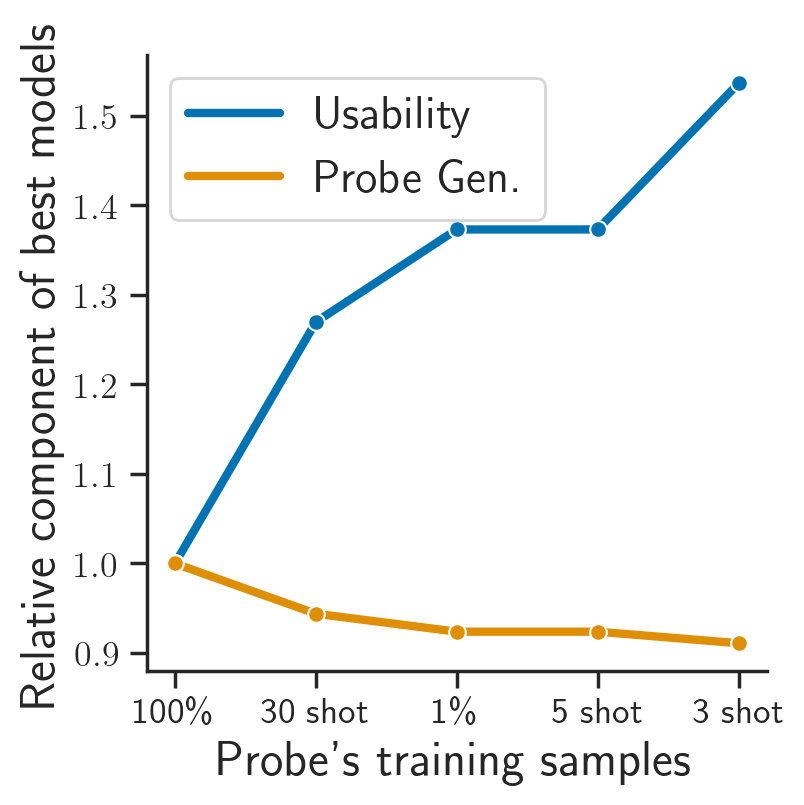

In [27]:
with plot_config(is_use_tex=True, 
                 rc={'lines.linewidth': 3,
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    fig, ax= plt.subplots(1,1, figsize=(4,4))
    
    g=sns.lineplot(comp_vs_samples, x="index", y="value", ax=ax, 
                   hue="variable", marker="o")
    g.legend().set_title(None)
    g.set(xlabel="Probe's training samples", 
          ylabel="Relative component of best models")
    
plt.savefig(f"figures/evaluation_tradeoff.pdf", 
            bbox_inches='tight', pad_inches=0)
    
    

#### Risk components predict performance across settings.

In [28]:
data = melt(df_nona.reset_index(), components=CORE_METRICS, var_name="metrics")
data["n_samples"] = [get_sample_size(m) for m in data["metrics"]]
data["objective"] = data["objective"].replace("clip+eb","lossyless")
data["n_params_probe"] = data["z_dim"]*1000
data = data[~data["value"].isna()]
print(f"Standard deviation to explain: {data['value'].std():.2f}")

data.groupby("metrics")['value'].std().to_frame().T

test_kwargs = dict(#test_mask = data["metrics"].isin(["train-nperclass-5_test","train-nperclass-30_test"]),
                   test_size=2*len(data["enc"].unique()),
                    stratify="enc"
                  )
N = data["n_samples"].max() -  50000 # n trainig samples for probe gen

Standard deviation to explain: 18.61


In [29]:
def f_pred_our2b(params, data, model_var):
    return (data["enc_gen"] +  (1-params["B"])*data["train_train"]+ (params["B"] *data["train_train"]  + data["probe_gen"]) * ( N/params["n_samples"])**params["alpha"]).clip(0,100)

kwargs = dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"])
results_2param = scalinglaw(data, **kwargs) 

*Train* RMSE: 4.4253. R2: 0.9434
*Test* RMSE: 4.4253. R2: 0.9434


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                          4.331345                 3.707048   
r2                            0.919077                 0.933680   
mse                           0.080332                 0.065797   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                   6.266425                5.172666    0.140666  
r2                     0.844629                0.894179    0.999774  
mse                    0.154176                0.105043    0.000224

param              B     alpha
value mean  0.502679  0.145647
      sem        NaN       NaN

N param: 2


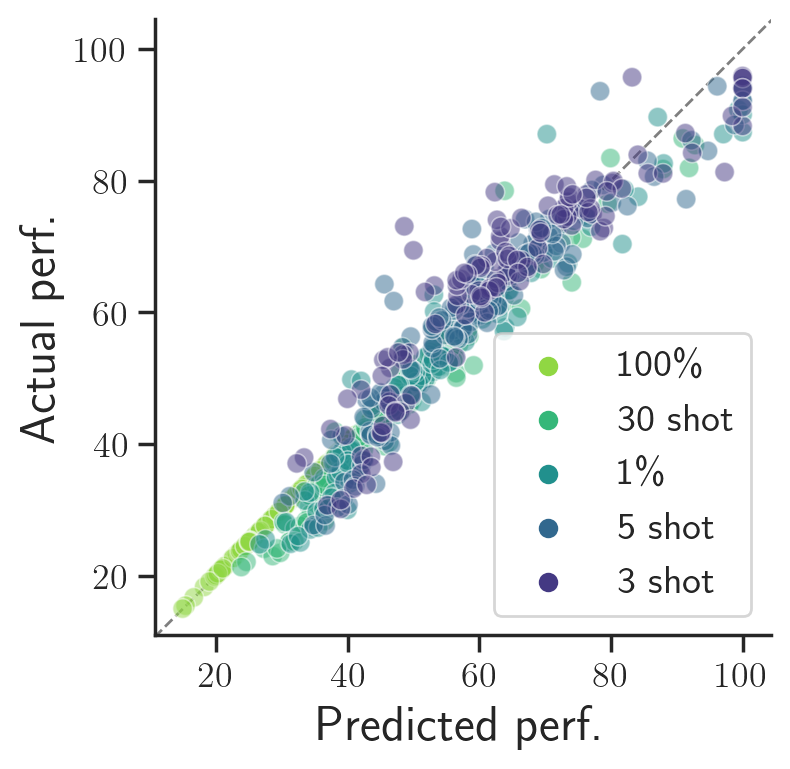

In [30]:
results = results_2param
with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, "ytick.labelsize": 13, "xtick.labelsize": 13,
                     "legend.fontsize": 14,
                    
                    }):
    fig, ax= plt.subplots(1,1, figsize=(4,4))
    
    tmp=pd.DataFrame({"Predicted perf.":results.eval(),
                     "Actual perf.":results.data,
                     "Samples":[PRETTY_RENAMER[m] for m in data["metrics"]]})
    g=sns.scatterplot(tmp, x="Predicted perf.", y="Actual perf.", ax=ax, hue="Samples",alpha=0.5,
                   palette="viridis_r",s=50,)#, hue_norm=SymLogNorm(linthresh=1,base=2),)
    g.legend_.set_title(None)
    #sns.move_legend(ax, "upper left")
    #g.set(xscale="log", yscale="log")
    
    #ax.set_xlim([0,100])
    #ax.set_ylim([0,100])
    ax.axis("square")
    #plt.xscale('log')
    #plt.yscale('log')
    
    # plot x=y
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  np.max([ax.get_xlim(), ax.get_ylim()])]
    ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0, linewidth=1)
    
plt.savefig("figures/evaluation_scalinglaw.pdf", bbox_inches='tight', pad_inches=0.1)

In [31]:
def f_pred_our1(params, data, model_var):
    return (data["enc_gen"] + data["train_train"]  + data["probe_gen"] * ( N/params["n_samples"])**params["alpha"]).clip(0,100)


In [32]:
%%time
enc_unique = data["enc"].unique()
np.random.seed(123)
all_test_kwargs = {"Random": dict(test_size=3*len(enc_unique), stratify="enc"),
                   "Samples" :dict(test_mask = data["metrics"].isin(["train-nperclass-5_test","train-nperclass-30_test"])),
                   "2022" : dict(test_mask = data["year"].isin([2022])),
                   "Encoder": dict(test_mask =  data["enc"].isin(np.random.choice(enc_unique, size=int(0.5*len(enc_unique))))),
                "Cntr." : dict(test_mask = data["ssl_mode"].isin(["contrastive"])),
                "ViT" : dict(test_mask  = data["family"].isin(["vit"])),
                   "ResNet" : dict(test_mask  = data["family"].isin(["resnet"])),
                   "Gen." : dict(test_mask = data["ssl_mode"].isin(["generative"])),
                  }

all_scalinglaws = {"Std": dict(f_pred = f_pred_param, possible_params = ["Irr", "C", "alpha","K","beta"], independent_vars = ["n_samples","n_params_probe"]),
                       "\ \ e=family" : dict(f_pred = f_pred_param, possible_params = ["Irr", "C", "alpha","K","beta"], independent_vars = ["n_samples","n_params_probe"], model_dep=["Irr", "C", "alpha"], model_col="family"),
                    "\ \ e=arch." : dict(f_pred = f_pred_param, possible_params = ["Irr", "C", "alpha","K","beta"], independent_vars = ["n_samples","n_params_probe"], model_dep=["Irr", "C", "alpha"], model_col="architecture"),
                    "\ \ e=obj." : dict(f_pred = f_pred_param, possible_params = ["Irr", "C", "alpha","K","beta"], independent_vars = ["n_samples","n_params_probe"], model_dep=["Irr", "C", "alpha"], model_col="objective"),
                    "\ \ e=enc." : dict(f_pred = f_pred_param, possible_params = ["Irr", "C", "alpha","K","beta"], independent_vars = ["n_samples","n_params_probe"], model_dep=["Irr", "C", "alpha"], model_col="enc"),
                   "Ours": dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"]),
                     "Ours 1" : dict(f_pred = f_pred_our1, possible_params = [ "alpha"], independent_vars = ["n_samples"]),  
                  }

all_results = dict()


    

for k_sl, v_sl in all_scalinglaws.items():
    all_results[k_sl] = dict()
    for k_test, v_test in all_test_kwargs.items():

        try:
            with io.capture_output() as captured:
                model, test_res = scalinglaw(data,
                                           is_return_results=True,
                                           **v_test,
                                           **v_sl)
                r2 = test_res["r2"]
        except ValueError as e:
            r2 = None

        all_results[k_sl]["n_param"] = len(model.params)
        all_results[k_sl][k_test] = r2      
    
all_results["test_perc"] = dict()
for k_test, v_test in all_test_kwargs.items():
    n_test = v_test["test_size"] if "test_size" in v_test else v_test["test_mask"].sum()
    all_results["test_perc"][k_test] =  n_test/len(data)



CPU times: user 1min 9s, sys: 54 s, total: 2min 3s
Wall time: 57.2 s


In [33]:
all_results_df=pd.DataFrame(all_results).T
all_results_df["n_param"] = all_results_df["n_param"].astype(pd.Int64Dtype())
all_results_df = all_results_df[["Random","2022","Cntr.","ViT","n_param"]] #"Encoder",,"Samples","n_param","ViT",

In [34]:
print(all_results_df.style.format(precision=2, na_rep="").to_latex(
                                   hrules=True, 
                                   label="tab:scaling_laws",
                                    position="h",
    
                            ))

\begin{table}[h]
\label{tab:scaling_laws}
\begin{tabular}{lrrrrr}
\toprule
 & Random & 2022 & Cntr. & ViT & n_param \\
\midrule
Std & 0.37 & -0.03 & 0.48 & -0.84 & 5 \\
\ \ e=family & 0.61 &  & 0.71 &  & 11 \\
\ \ e=arch. &  &  &  &  & 41 \\
\ \ e=obj. & 0.83 &  &  &  & 86 \\
\ \ e=enc. &  &  &  &  & 413 \\
Ours & 0.94 & 0.92 & 0.96 & 0.84 & 2 \\
Ours 1 & 0.89 & 0.87 & 0.92 & 0.72 & 1 \\
test_perc & 0.62 & 0.24 & 0.36 & 0.26 &  \\
\bottomrule
\end{tabular}
\end{table}



### Effect of hyperparameters

#### Dimension

#### Projection head (?)

#### Architecture

#### Augmentations (?)

#### Negatives (?)

#### Classes (?)

#### SSL mode (?)

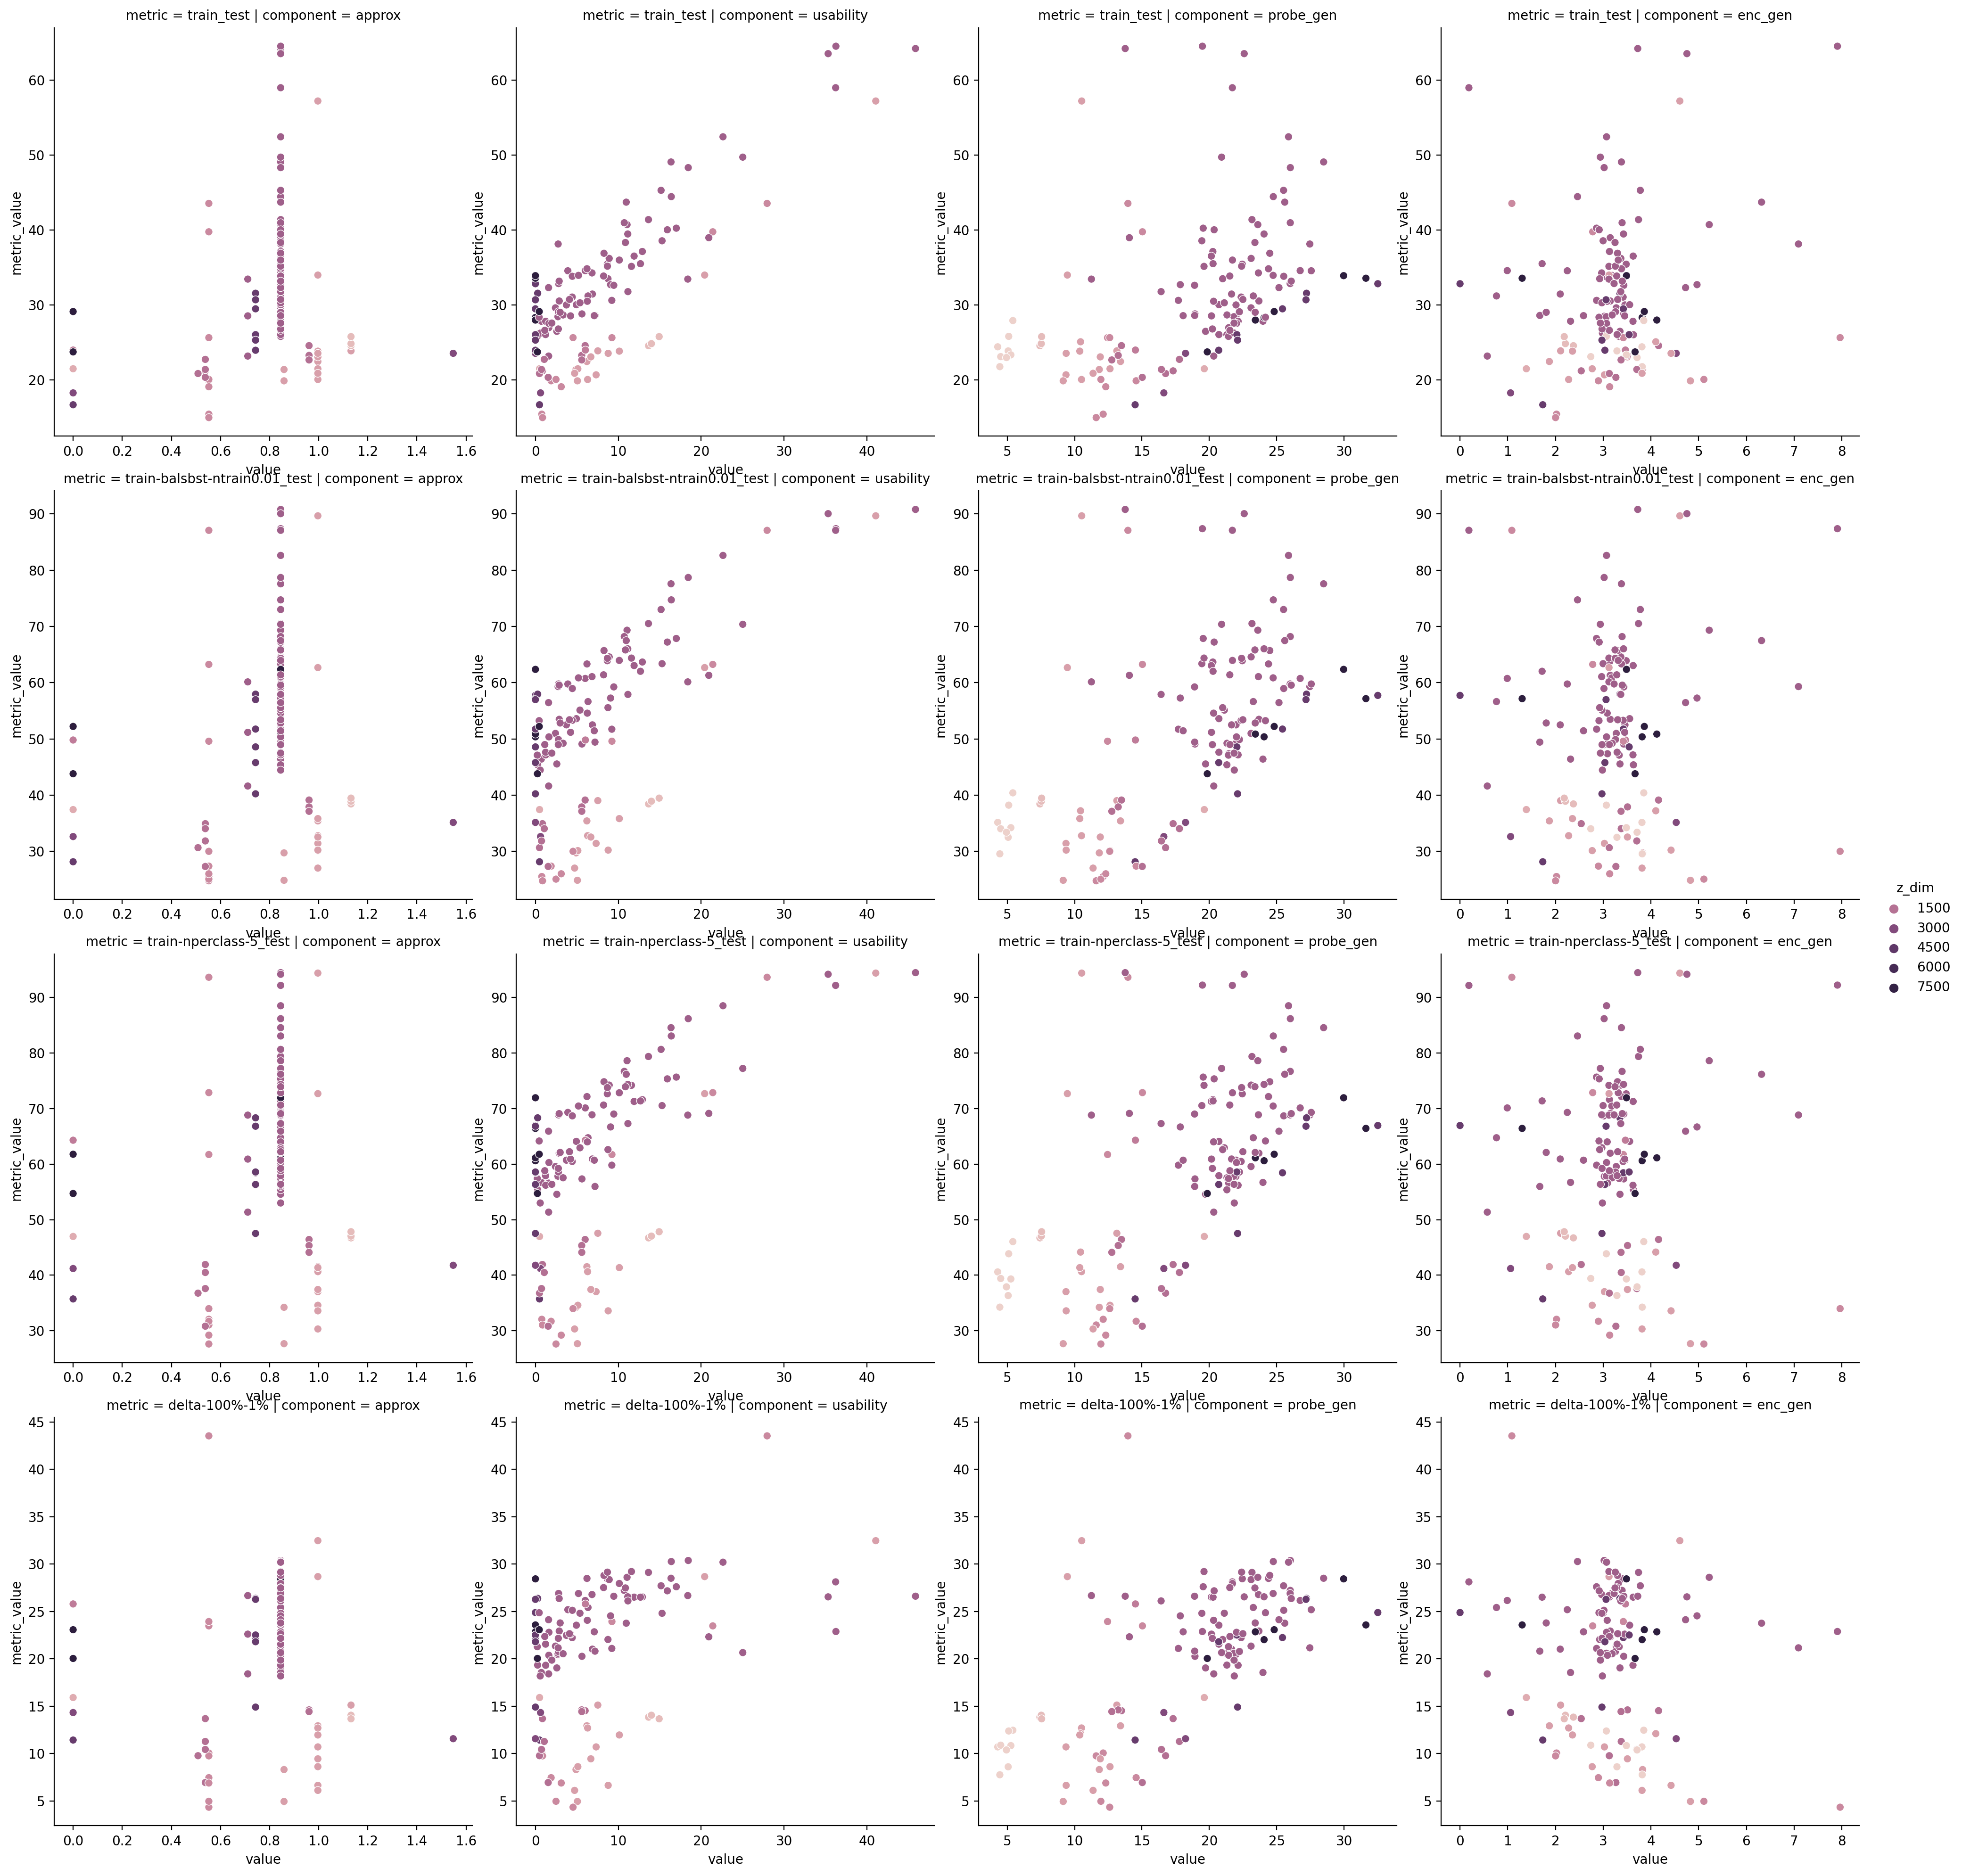

In [27]:
sns.relplot(data=melted_metrics, 
                    x="value", 
                    y="metric_value", 
                    hue="z_dim", 
                hue_norm=SymLogNorm(linthresh=1,base=2),
                    col="component", 
                    row="metric",
                    kind="scatter",
                    facet_kws={'sharey': False, 'sharex': False})

Given that no model is uniformly better over risk components it is likely that no model is uniformly better 

In [29]:
df[CORE_METRICS+COMPONENTS_ONLY].sort_values("train_test").head()

train_test  train-balsbst-ntrain0.01_test  \
enc                                                            
clip_vitl14_px336   15.009999                         24.776   
clip_vitl14         15.464000                         25.532   
clip_rn50x64        16.718000                         28.156   
clip_rn50x16        18.300000                         32.638   
mugs_vitl16_ep250   19.115999                         26.020   

                   train-nperclass-5_test    approx  usability  probe_gen  \
enc                                                                         
clip_vitl14_px336                  31.052  0.552543   0.855470  11.599987   
clip_vitl14                        32.076  0.552543   0.768518  12.120938   
clip_rn50x64                       35.738  0.000000   0.492051  14.491948   
clip_rn50x16                       41.206  0.000000   0.617952  16.622048   
mugs_vitl16_ep250                  29.222  0.552543   3.114895  12.312562   

                    enc_gen  
enc                          
clip_vitl14_px336  2.001999  
clip_vitl14        2.022001  
clip_rn50x64       1.734000  
clip_rn50x16       1.060000  
mugs_vitl16_ep250  3.136000

In [30]:
df[CORE_METRICS+COMPONENTS_ONLY].sort_values("train_test").head().mean().to_frame().T

train_test  train-balsbst-ntrain0.01_test  train-nperclass-5_test  \
0     16.9216                        27.4244                 33.8588   

     approx  usability  probe_gen  enc_gen  
0  0.331526   1.169777  13.429496   1.9908

In [31]:
df[CORE_METRICS+COMPONENTS_ONLY].sort_values("train-nperclass-5_test").head()

train_test  train-balsbst-ntrain0.01_test  \
enc                                                                     
msn_vitl7_ep200              20.094000                         25.070   
msn_vitb4_ep300              19.905999                         24.864   
mugs_vitl16_ep250            19.115999                         26.020   
mugs_vitb16_ep400            20.908000                         27.032   
mugs_vitb16_ep400_extractb   20.367999                         27.322   

                            train-nperclass-5_test    approx  usability  \
enc                                                                       
msn_vitl7_ep200                             27.632  0.552543   2.481878   
msn_vitb4_ep300                             27.688  0.858748   5.066631   
mugs_vitl16_ep250                           29.222  0.552543   3.114895   
mugs_vitb16_ep400                           30.336  0.996513   4.727096   
mugs_vitb16_ep400_extractb                  30.834  0.538259   1.540861   

                            probe_gen   enc_gen  
enc                                              
msn_vitl7_ep200             11.949579  5.110000  
msn_vitb4_ep300              9.152622  4.827999  
mugs_vitl16_ep250           12.312562  3.136000  
mugs_vitb16_ep400           11.370390  3.814000  
mugs_vitb16_ep400_extractb  15.022880  3.265999

In [32]:
df[CORE_METRICS+COMPONENTS_ONLY].sort_values("train-nperclass-5_test").head().mean().to_frame().T

train_test  train-balsbst-ntrain0.01_test  train-nperclass-5_test  \
0   20.078399                        26.0616                 29.1424   

     approx  usability  probe_gen  enc_gen  
0  0.699721   3.386272  11.961606   4.0308

And indeed we see that the models are worst on all components but probe gen!

### Important parameters

In [ ]:
- Check projection heads (see ruan et al)
- ViT

#### Epochs

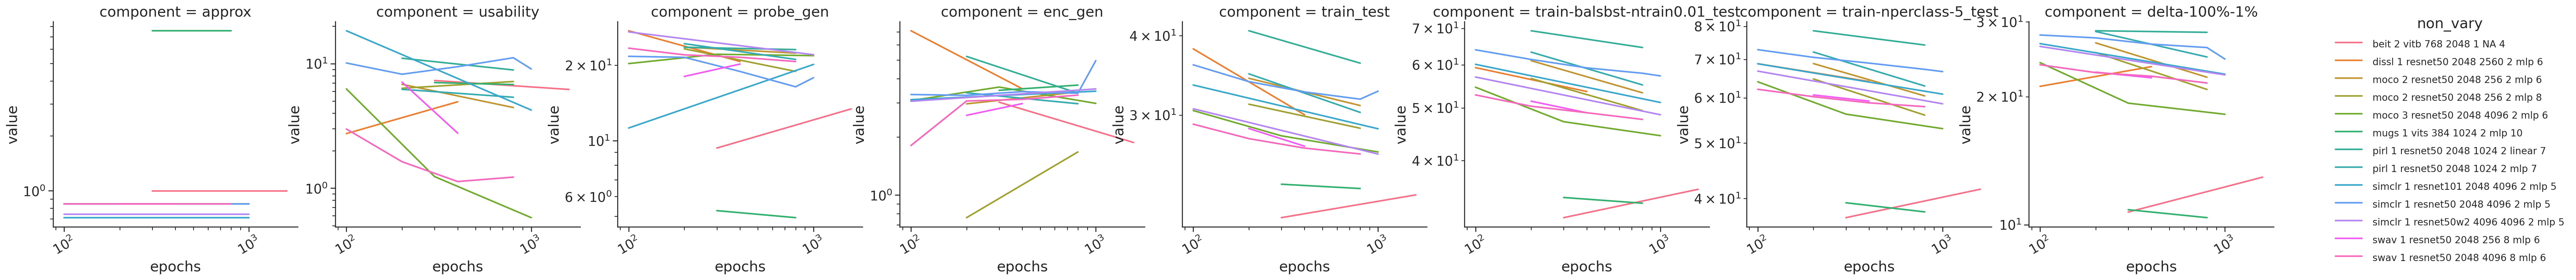

### Architecture

#### Size
First let us consider the effect of the size of the architecture

**Hypothesis** Larger architectures should first and foremost decrease the approximation gap. Furthermore larger models typically have larger diemnsionality and thus from the previous paragraph we hypothesize that the probing generalization should worsen and the usability should improve.

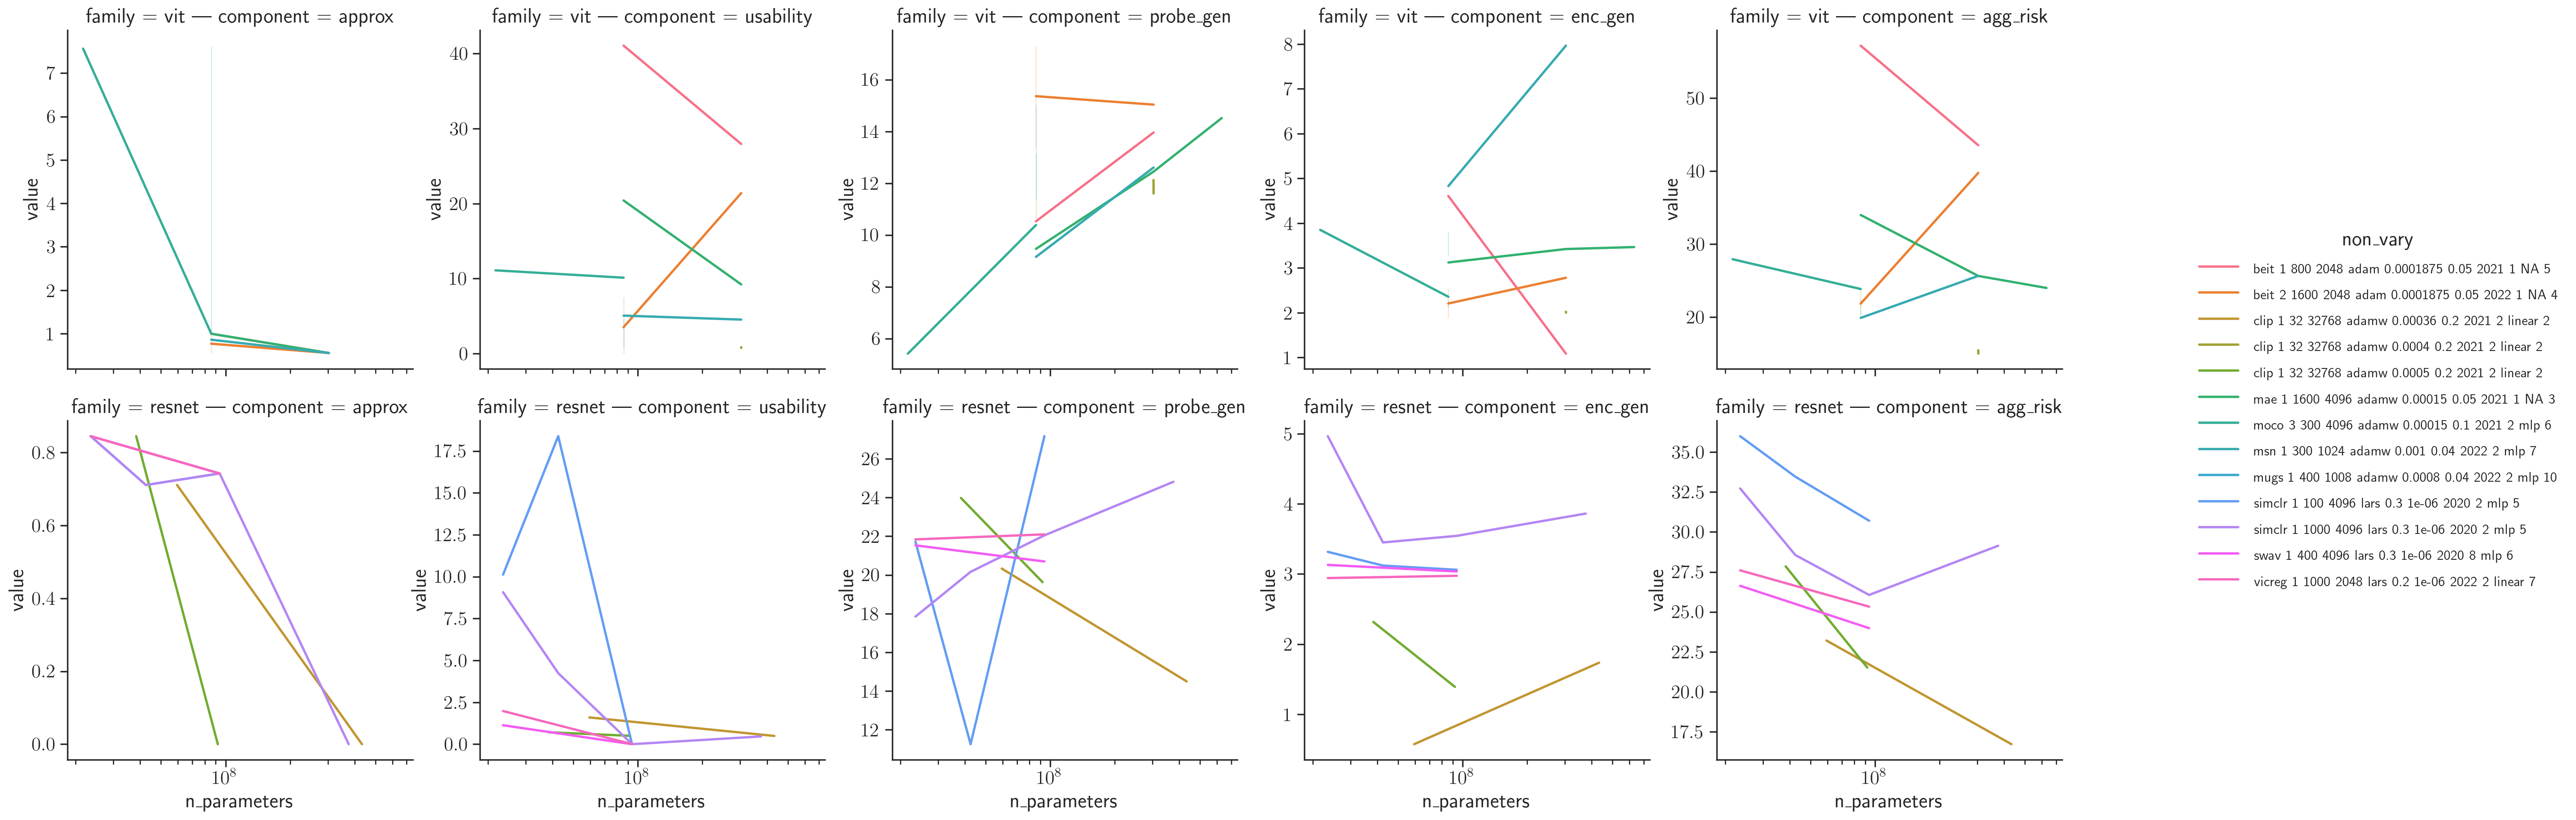

In [35]:
disregard = ["img_size","z_layer","patch_size","z_dim"]
df_arch = melt(get_only_vary(df.drop(columns=disregard), 
                             ["architecture"], 
                             [c for c in core_params if c not in disregard],
                              drop_cols=["pretraining_data"]))
#df_arch.n_parameters = df_arch.n_parameters // int(5e6) * int(5e6)

with plot_config():
    g = sns.relplot(data=df_arch, x="n_parameters", y="value", hue="non_vary", col="component", row="family", kind="line",
                    facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set_xticklabels(rotation=30)

#### ViT vs ResNet
Now that we have considered the effect of number of parameters, let us consider the effect of using ViT vs ResNet

**Hypothesis** This is very hard to say, but the encoder generalization likely worsen when going to ViT while approx error probably improves.

Mean of empty slice
Mean of empty slice


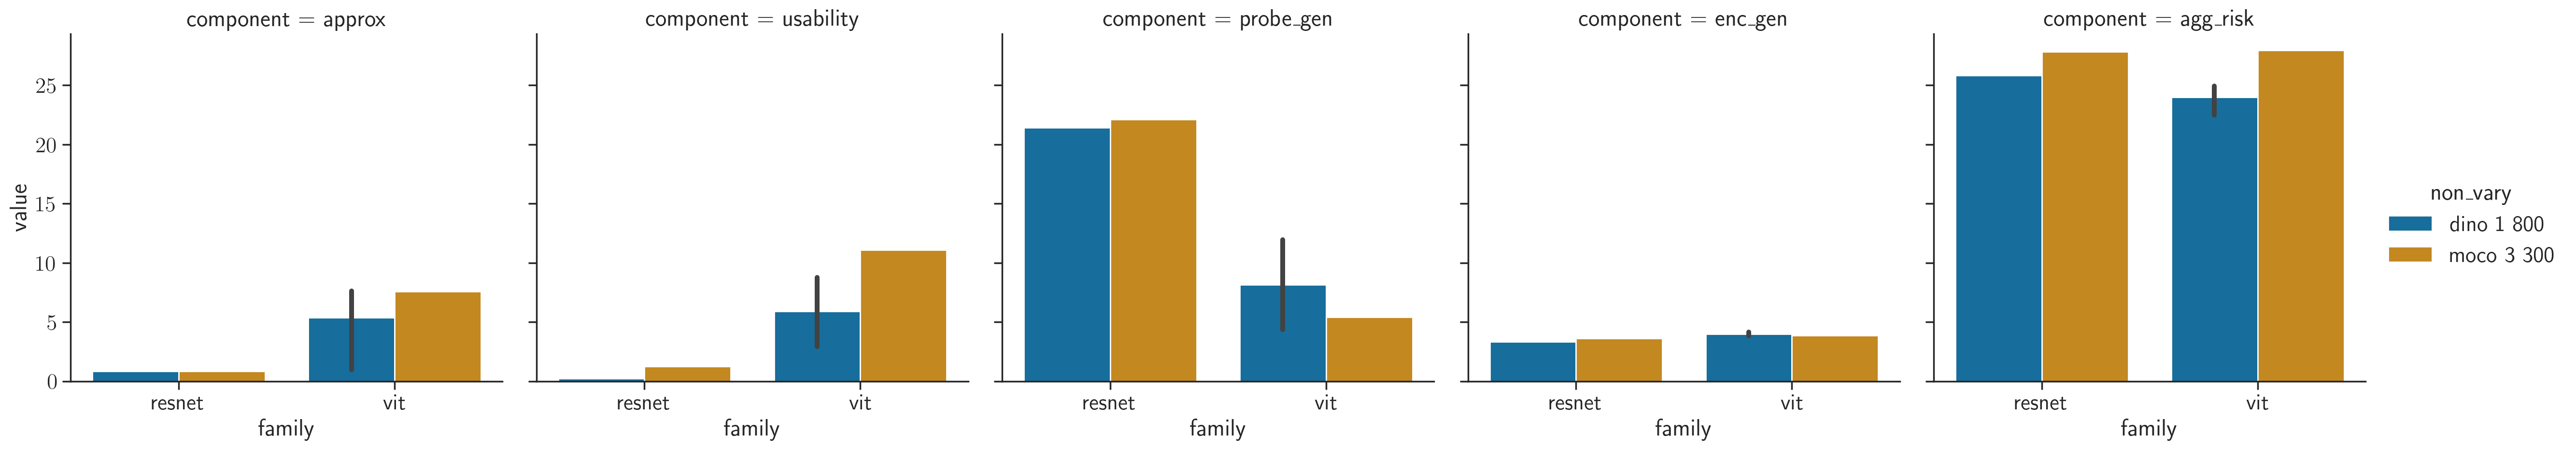

In [43]:
curr_df = df.copy()
curr_df.n_parameters = curr_df.n_parameters // int(30e6) * int(30e6) # coarse grains

df_family = melt(get_only_vary(curr_df, ["family"],  ["family","objective","n_parameters","version","epochs"]))


with plot_config():
    g = sns.catplot(data=df_family, x="family", y="value", hue="non_vary", col="component", kind="bar",
                    facet_kws={'sharey': False})
    #plt.setp(g._legend.get_texts(), fontsize=12)

#### nviews

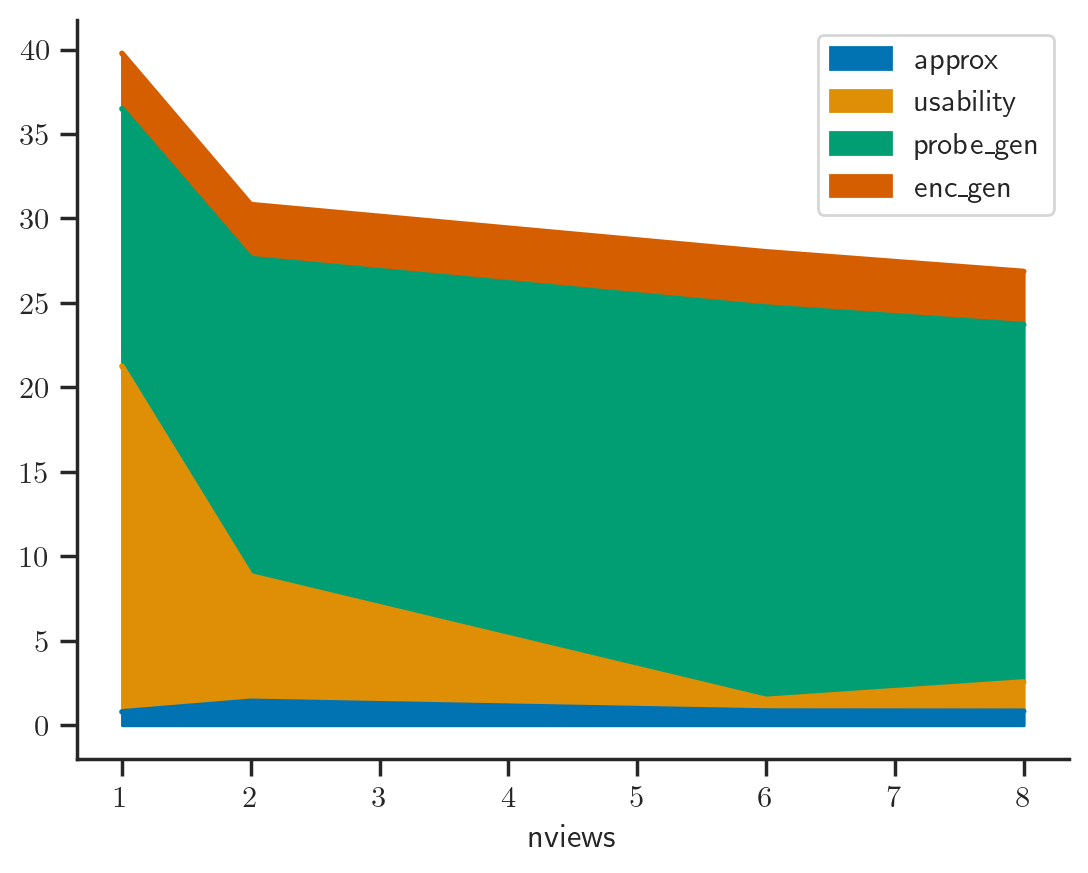

In [150]:
with plot_config(font_scale=1):
    curr_df = copy.deepcopy(df[COMPONENTS_ONLY + ["nviews"]])
    curr_df.groupby("nviews").mean().plot.area()

In [18]:
df_nviews = melt(get_only_vary(df, ["nviews"], core_params), components=COMPONENTS_ONLY+METRICS)

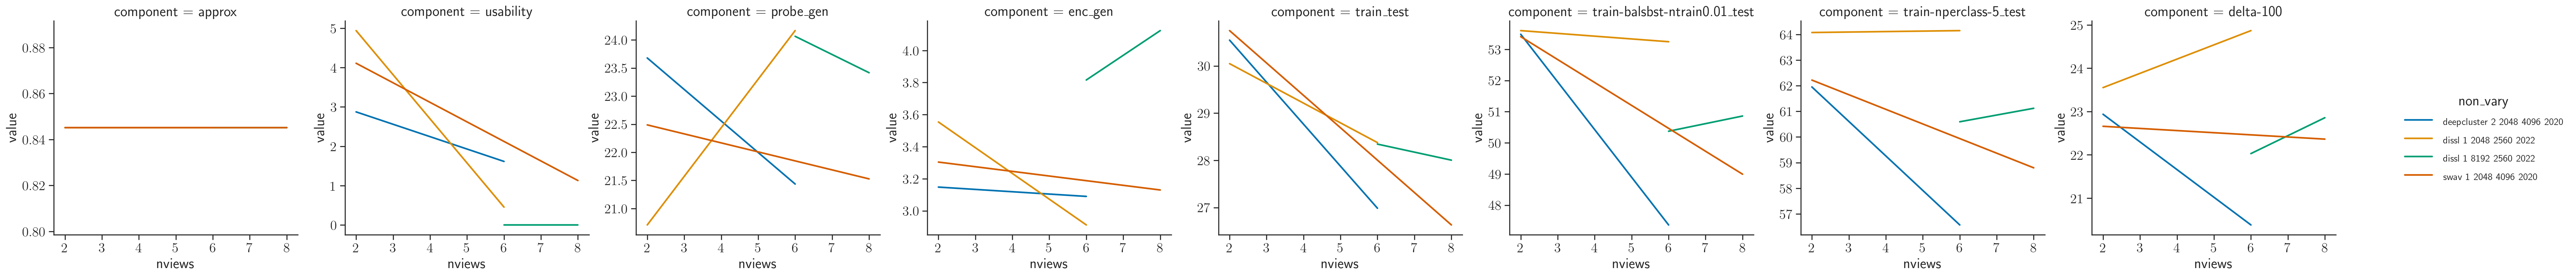

In [149]:


with plot_config():
    g = sns.relplot(data=df_nviews, x="nviews", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    #g.set(yscale="log")
    


In [151]:
ols_summary(df_nviews, "nviews",  condition=['non_vary', '{treatment}'], f_outcome="", 
            objectives=COMPONENTS_ONLY+METRICS)

                                  train_test                                  
Dep. Variable:                  value   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     8.721
Date:                Tue, 01 Nov 2022   Prob (F-statistic):             0.0531
Time:                        10:47:11   Log-Likelihood:                -4.3041
No. Observations:                   8   AIC:                             18.61
Df Residuals:                       3   BIC:                             19.01
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
rmse: 0.4143991312548452, delta: 0
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

kurtosistest only valid for n>=20 ... continuing anyway, n=8
divide by zero encountered in double_scalars
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8


#### Batch size

In [20]:
df_bs = melt(get_only_vary(df, ["batch_size"], core_params), components=COMPONENTS_ONLY+METRICS)

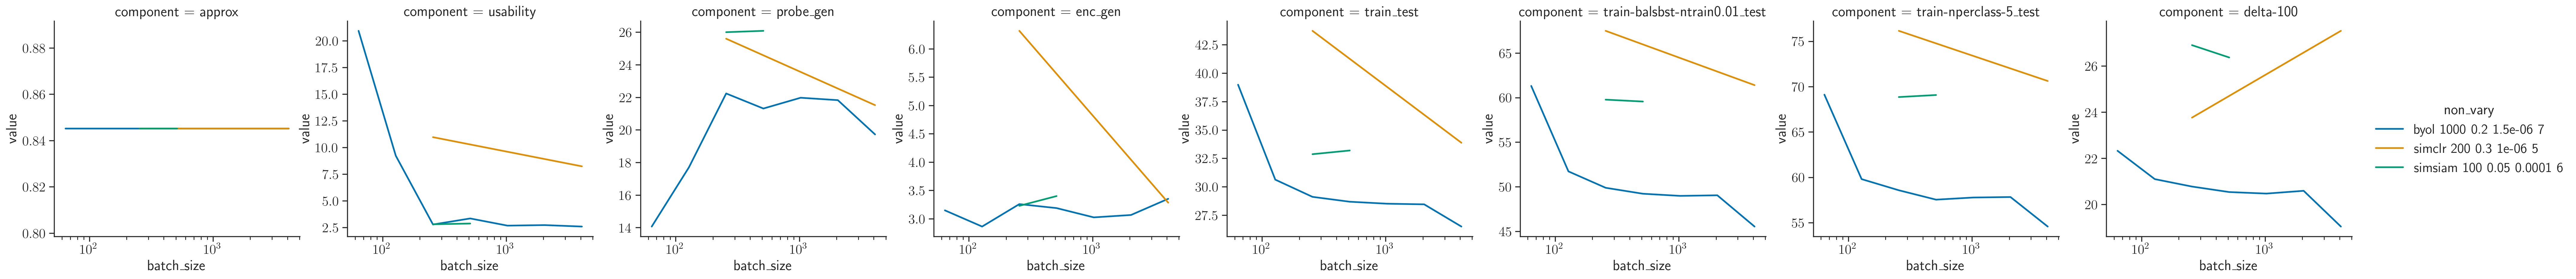

In [143]:


with plot_config():
    g = sns.relplot(data=df_bs, x="batch_size", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    #plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set(yscale="log")

In [21]:
ols_summary(df_bs, "batch_size", outcome="value", condition=['non_vary', 'np.log({treatment})'], f_outcome="log_delta", 
            objectives=COMPONENTS_ONLY+METRICS)

kurtosistest only valid for n>=20 ... continuing anyway, n=11
divide by zero encountered in double_scalars
kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11


                                  usability                                   
Dep. Variable:          np.log(value)   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     5.352
Date:                Tue, 01 Nov 2022   Prob (F-statistic):             0.0314
Time:                        10:54:36   Log-Likelihood:                -5.1458
No. Observations:                  11   AIC:                             18.29
Df Residuals:                       7   BIC:                             19.88
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
rmse: 3.963166454168931, delta: -0.1
                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11


                                  train_test                                  
Dep. Variable:          np.log(value)   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     17.20
Date:                Tue, 01 Nov 2022   Prob (F-statistic):            0.00131
Time:                        10:54:37   Log-Likelihood:                 5.9604
No. Observations:                  11   AIC:                            -3.921
Df Residuals:                       7   BIC:                            -2.329
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
rmse: 1.7416844855278628, delta: 21.131577818017252
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11


                        train-balsbst-ntrain0.01_test                         
Dep. Variable:          np.log(value)   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     21.93
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           0.000618
Time:                        10:54:37   Log-Likelihood:                 20.366
No. Observations:                  11   AIC:                            -32.73
Df Residuals:                       7   BIC:                            -31.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
rmse: 2.132005673183085, delta: -0.1
                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11


                            train-nperclass-5_test                            
Dep. Variable:          np.log(value)   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     23.18
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           0.000519
Time:                        10:54:38   Log-Likelihood:                 22.169
No. Observations:                  11   AIC:                            -36.34
Df Residuals:                       7   BIC:                            -34.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
rmse: 2.0710537855856295, delta: -0.1
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

kurtosistest only valid for n>=20 ... continuing anyway, n=11
